In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

### Load Dataset 1: Boston Housing dataset

In [2]:
df = pd.read_csv('boston.csv')

# drop the column 'B'
df = df.drop(columns=['B'])

print(df.head())
print(f"{df.shape[0]} rows\n{df.shape[1]} columns")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
506 rows
13 columns


### Put the 'Labels' column (MEDV) in the first column, followed by the 12 columns as 'Features'

In [3]:
# Get the name of the last column
last_column_name = df.columns[-1]

# Save the last column into a temporary variable
last_column = df[last_column_name]

# Drop the last column
df = df.drop(columns=[last_column_name])

# Insert the last column at the beginning of the DataFrame
df.insert(0, last_column_name, last_column)

# Print the modified DataFrame
print(df.head())
print(f"{df.shape[0]} rows\n{df.shape[1]} columns")

   MEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  24.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  21.6  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  34.7  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  33.4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  36.2  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  
0     15.3   4.98  
1     17.8   9.14  
2     17.8   4.03  
3     18.7   2.94  
4     18.7   5.33  
506 rows
13 columns


### check missing value

In [4]:
# Use boolean indexing to find rows containing '?'
rows_with_question_mark = df[df.eq('?').any(axis=1)]

# Check if there are rows with '?'
if not rows_with_question_mark.empty:
    print("DataFrame contains rows with '?'")
    print(rows_with_question_mark)
else:
    print("DataFrame does not contain rows with '?'")

DataFrame does not contain rows with '?'


### dataset export

In [5]:
# Save the DataFrame to a CSV file
# df.to_csv('./boston_clean.csv', index=False, mode='w')

# basic statistics on the data

In [19]:
# Extract the features and the label
features = df.drop(columns=['MEDV'])
label = df['MEDV']
# Compute the correlation matrix between features
feature_correlation_matrix = features.corr()

# Display the correlation matrix
feature_correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


In [23]:
# Compute the average absolute correlation for each feature
average_correlation = feature_correlation_matrix.mean(axis=0).sort_values(ascending=False)

# Select the top 5 most important features
top_5_feature_with_feature = average_correlation.head(5)
top_5_feature_with_feature

TAX      0.351371
RAD      0.343999
INDUS    0.295613
NOX      0.289879
CRIM     0.273237
dtype: float64

In [24]:
# Compute the correlation between each feature and the label
correlations = features.corrwith(label)
# Select the top 5 features with highest absolute correlation with the label
top_5_features_with_label = correlations.sort_values(ascending=False).head(5)
top_5_features_with_label

RM      0.695360
ZN      0.360445
DIS     0.249929
CHAS    0.175260
AGE    -0.376955
dtype: float64

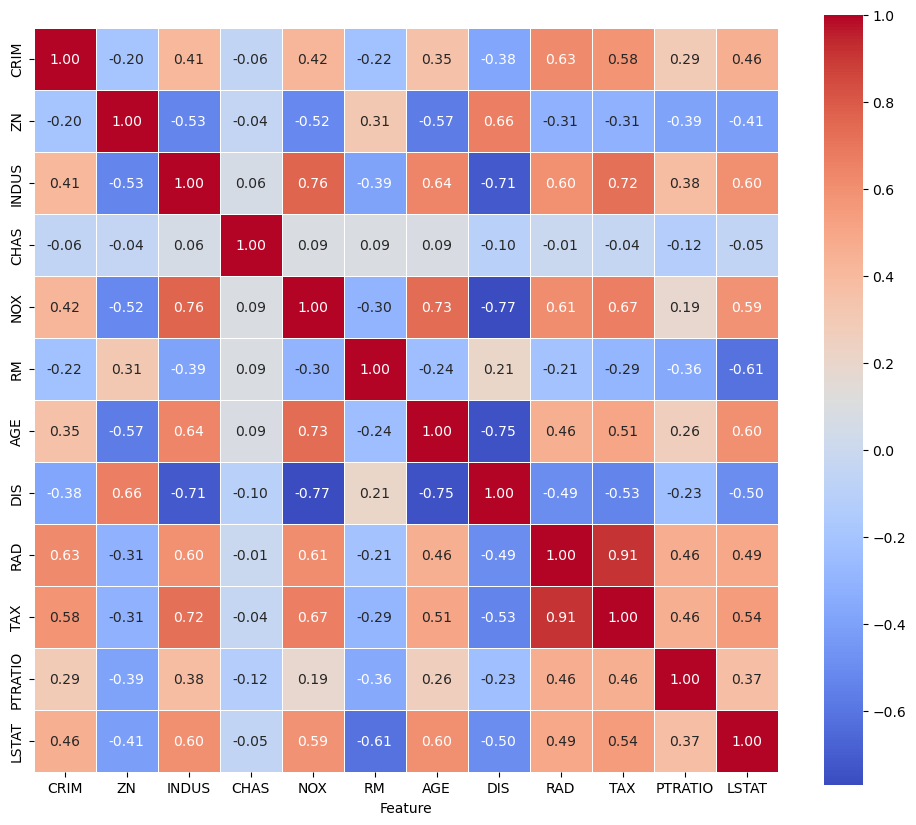

In [33]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(feature_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Set plot title
# plt.title('Feature Correlation Matrix Heatmap')

# Show the plot
plt.show()

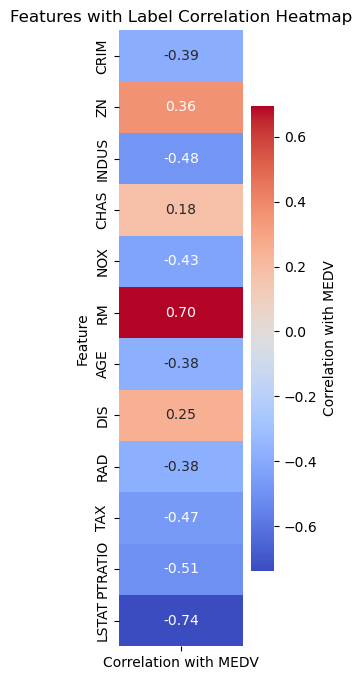

In [28]:
# Create a DataFrame for features with label correlation
features_with_label_corr = pd.DataFrame(correlations)
features_with_label_corr.columns = ['Correlation with MEDV']
features_with_label_corr.index.name = 'Feature'

# Set up the matplotlib figure
plt.figure(figsize=(2, 8))

# Draw the heatmap
sns.heatmap(features_with_label_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation with MEDV'})

# Set plot title
plt.title('Features with Label Correlation Heatmap')

# Show the plot
plt.show()

### features ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

CRIM - Min: 0.00632, Max: 88.9762, Mean: 3.613523557312254, Std: 8.601545105332487


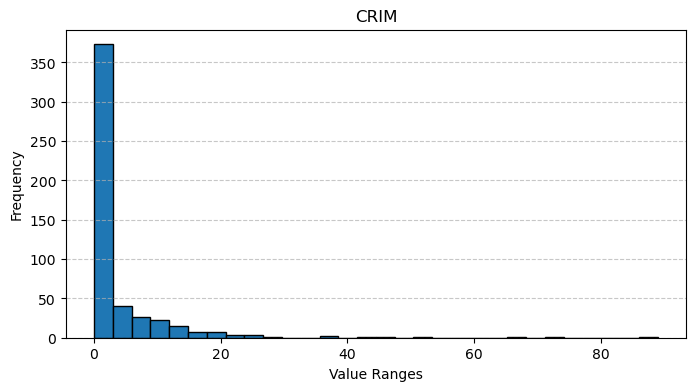

ZN - Min: 0.0, Max: 100.0, Mean: 11.363636363636363, Std: 23.322452994515036


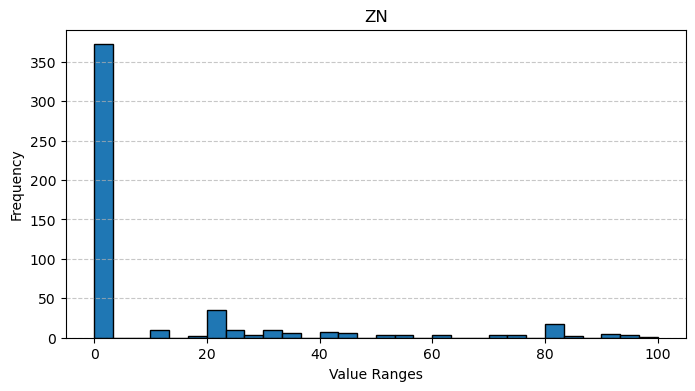

INDUS - Min: 0.46, Max: 27.74, Mean: 11.13677865612648, Std: 6.8603529408975845


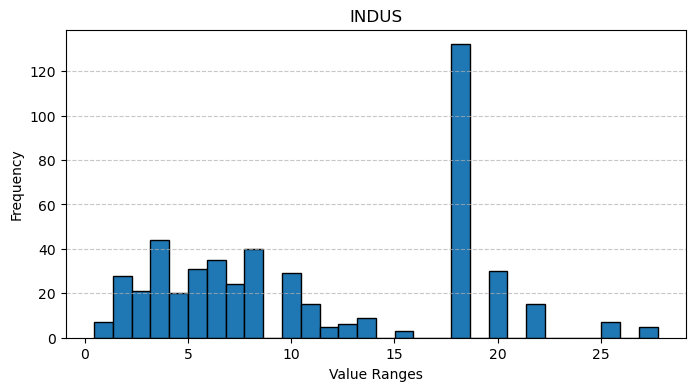

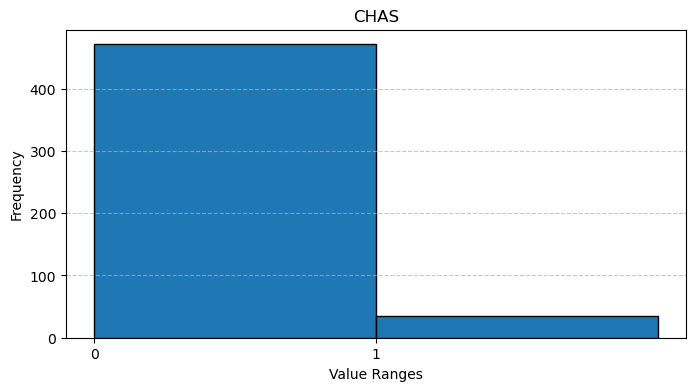

NOX - Min: 0.385, Max: 0.871, Mean: 0.5546950592885376, Std: 0.11587767566755611


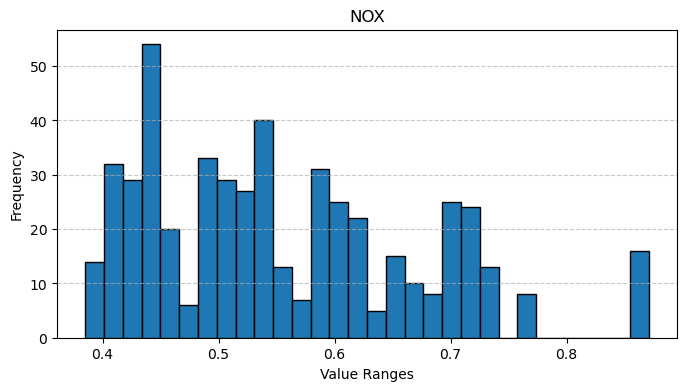

RM - Min: 3.561, Max: 8.78, Mean: 6.284634387351779, Std: 0.7026171434153237


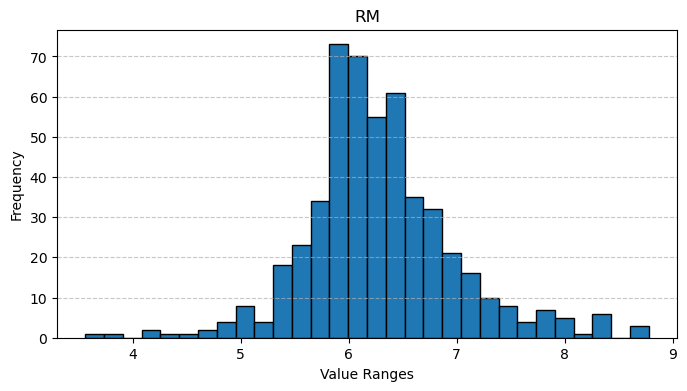

AGE - Min: 2.9, Max: 100.0, Mean: 68.57490118577076, Std: 28.148861406903638


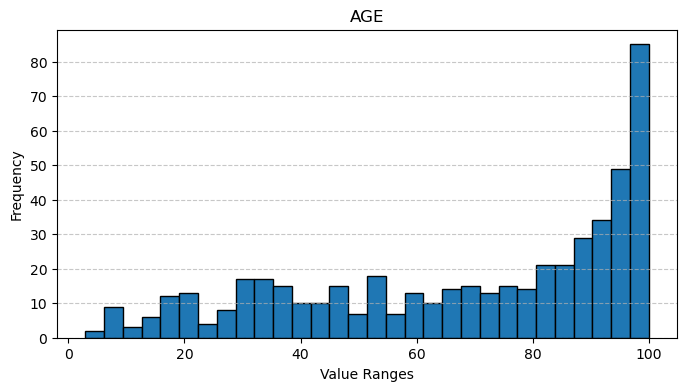

DIS - Min: 1.1296, Max: 12.1265, Mean: 3.795042687747036, Std: 2.1057101266276104


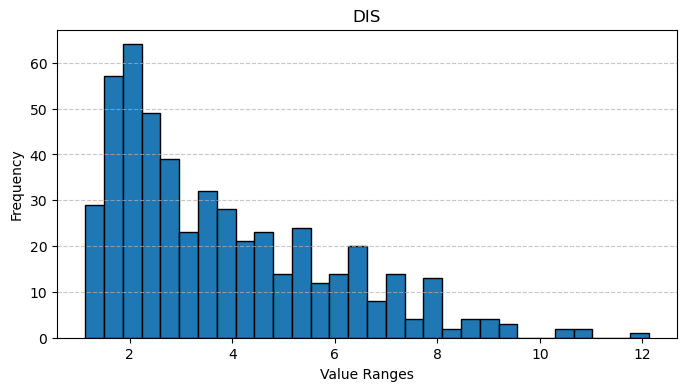

RAD - Min: 1.0, Max: 24.0, Mean: 9.549407114624506, Std: 8.707259384239377


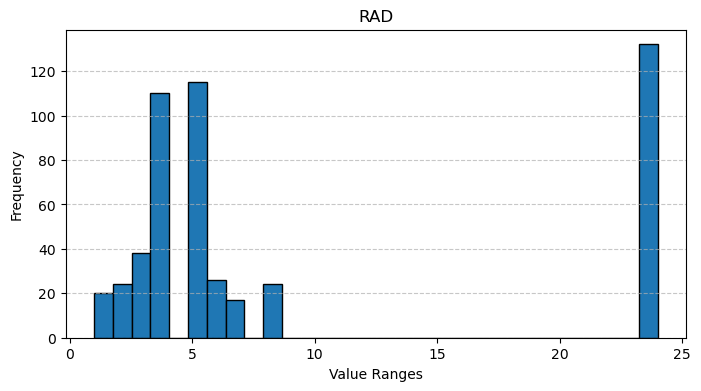

TAX - Min: 187.0, Max: 711.0, Mean: 408.2371541501976, Std: 168.53711605495926


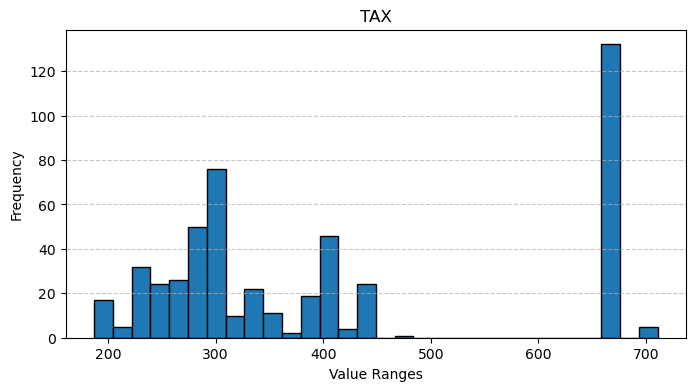

PTRATIO - Min: 12.6, Max: 22.0, Mean: 18.455533596837945, Std: 2.164945523714446


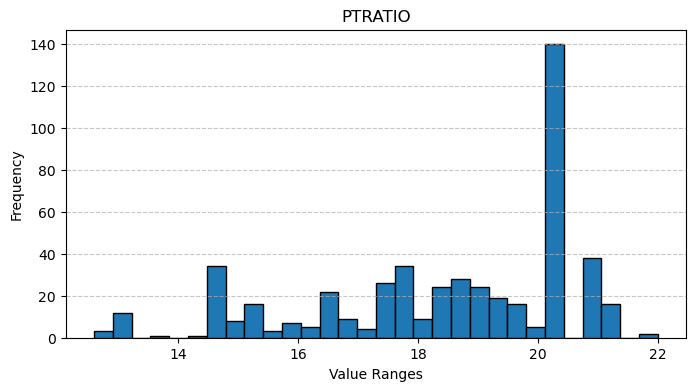

LSTAT - Min: 1.73, Max: 37.97, Mean: 12.653063241106722, Std: 7.141061511348571


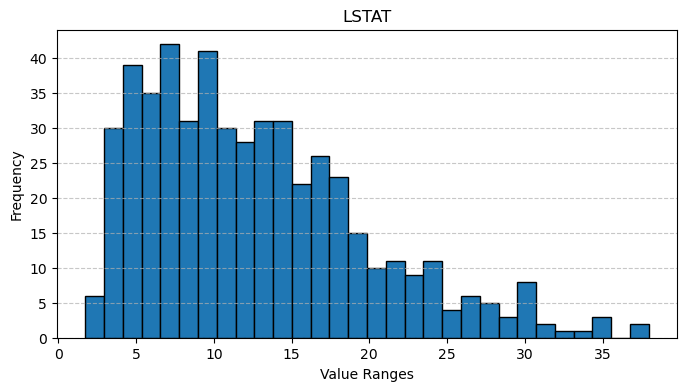

In [7]:
columns_to_process = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# 2. Create a histogram for each column, dividing into 10 bins based on min and max values
for column in columns_to_process:
    plt.figure(figsize=(8, 4))  # Set the figure size
    
    if column == 'CHAS':
        # Plot only the counts of 0 and 1 in the CHAS column
        plt.hist(df['CHAS'], bins=[0, 1, 2], edgecolor='k')
        plt.xticks([0, 1])  # Set X-axis ticks to 0 and 1
    else:
        # Create a histogram using plt.hist, dividing into 30 bins based on min and max values
        plt.hist(df[column], bins=30, edgecolor='k')
        
        # Print min, max, mean, and std
        column_stats = df[column].describe()
        print(f'{column} - Min: {column_stats["min"]}, Max: {column_stats["max"]}, Mean: {column_stats["mean"]}, Std: {column_stats["std"]}')
    
    plt.title(f'{column}')
    plt.xlabel('Value Ranges')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

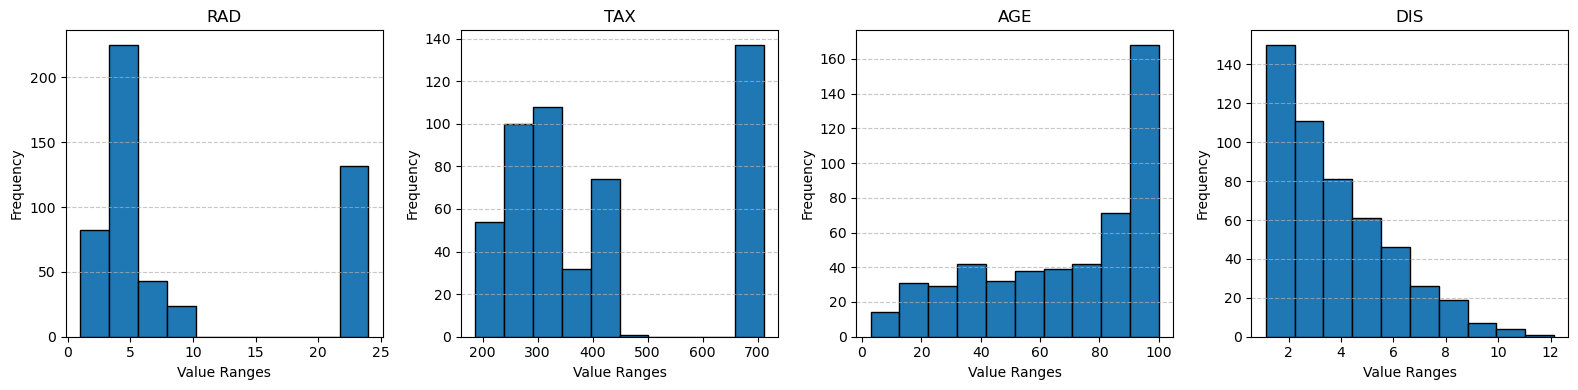

In [30]:
columns_to_process = ['RAD', 'TAX', 'AGE', 'DIS']

# Create a horizontal subplot with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, column in enumerate(columns_to_process):
    # Create a histogram for each column with 10 bins
    axes[i].hist(df[column], bins=10, edgecolor='k')

    axes[i].set_title(column)
    axes[i].set_xlabel('Value Ranges')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### label - MEDV

MEDV - Min: 5.0, Max: 50.0, Mean: 22.532806324110677, Std: 9.19710408737982


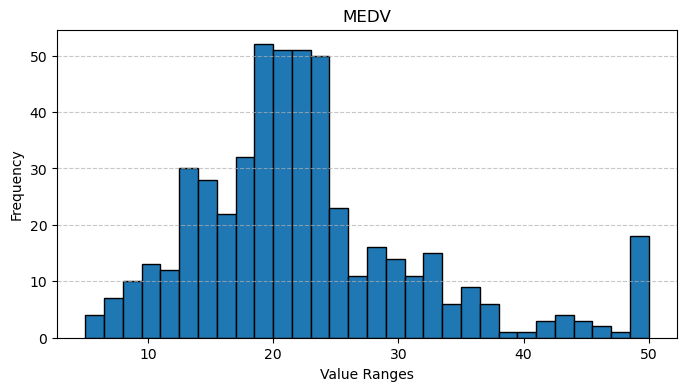

In [8]:
# Create a histogram for the 'MEDV' column, dividing into 30 bins based on min and max values
plt.figure(figsize=(8, 4))  # Set the figure size
plt.hist(df['MEDV'], bins=30, edgecolor='k')

# Print min, max, mean, and std for the 'MEDV' column
column_stats = df['MEDV'].describe()
print(f'MEDV - Min: {column_stats["min"]}, Max: {column_stats["max"]}, Mean: {column_stats["mean"]}, Std: {column_stats["std"]}')

plt.title('MEDV')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()